In [2]:
# Import libraries
import gurobipy as grb
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib 
%matplotlib inline

GRB = grb.GRB

The increase revenue:
$$\sum_i^{483} R_i*y_i=\sum_i^{483} R_i(a_1x_1^{(i)}+a_2x_2^{(i)}+C^{(i)})= \sum_i^{483} R_i(a_1x_1^{(i)}+a_2x_2^{(i)})+\sum_i^{483}R_iC^{(i)}=\sum_i^{483}R_i(a_1x_1^{(i)}+a_2x_2^{(i)})+C_0$$
Since the constant does not affect the optimization, we can simplify the integer linear equation to maximize:
$$\sum_i^{483}R_i(a_1x_1^{(i)}+a_2x_2^{(i)})$$
where for each store i, $R_i$ is the originial revenue , $y_i$ is the projected growth rate predicted by variables, $C^{(i)}$ is the constant factor of the store. 

The parameter $a_1,a_2$, trained from the dataset, is assumed as the same for all store.

Subject to: 
- The store originially open 14 hours, hire 24 associates. $$S=483*14*(10*24+250)$$
Zero expense change with each store had a utilities cost of $250$ per store per hour open, and an average cost of $10$ per employee per hour: $$S=\sum_i^{483}(10(x_1^{(i)}+24)+250)(14+x_2^{(i)})=\sum_i^{483}10*x_1^{(i)}*14+10*x_1^{(i)}*x_2^{(i)}+10*24*14+10*24*x_2^{(i)}+250*14+250*x_2^{(i)}$$
Simplify as: $$0=\sum_i^{483}140x_1^{(i)}+10x_1^{(i)}x_2^{(i)}+240x_2^{(i)}+250x_2^{(i)}$$
- The number of associates change: $x_1^{(i)}\in \{0, +2, +4\}$
- The number of openning hours change: $x_2^{(i)}\in \{0, -1, -2\}$

```
(lm(formula = y1 ~ x1 + x2 + x4 + x5 + x6 + x7 + x8 + x9 + AL + 
     IL + LA + MI + OH + PA + SC + SD + WA + WV + x1:x4 + x1:x8 + 
     x2:x4 + x2:x8 + x4:x6 + x4:x9 + x5:x7 + x6:x9, data = newstore))
To maximize:
x_1*(-0.481+x_4*2.256+x_8*2.578)+x_2*(-3.689-x_4*2.329-x_8*1.475)

Residuals:
    Min      1Q  Median      3Q     Max 
-573.75 -156.34    4.06  157.33  634.99 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.299e+02  1.816e+02   5.122 4.47e-07 ***
x1          -1.391e+01  2.892e+01  -0.481 0.630841    
x2          -1.796e+02  4.869e+01  -3.689 0.000253 ***
x4           4.260e+00  3.189e+00   1.336 0.182321    
x5           9.579e+00  3.250e+00   2.948 0.003367 ** 
x6          -5.233e-05  1.784e-04  -0.293 0.769391    
x7           3.915e+01  1.563e+01   2.504 0.012616 *  
x8           1.693e-01  1.078e+00   0.157 0.875353    
x9          -2.247e+02  1.564e+02  -1.437 0.151516    
AL           6.040e+02  2.504e+02   2.412 0.016253 *  
IL          -6.991e+01  4.662e+01  -1.500 0.134394    
LA           1.708e+02  7.982e+01   2.140 0.032864 *  
MI          -2.020e+02  8.449e+01  -2.391 0.017200 *  
OH           9.772e+01  5.338e+01   1.831 0.067778 .  
PA           8.477e+01  5.568e+01   1.522 0.128578    
SC          -1.803e+02  1.030e+02  -1.751 0.080614 .  
SD          -3.987e+02  2.454e+02  -1.625 0.104932    
WA          -1.214e+02  8.394e+01  -1.446 0.148732    
WV          -2.135e+02  1.460e+02  -1.462 0.144429    
x1:x4        1.352e+00  5.994e-01   2.256 0.024529 *  
x1:x8        2.648e+00  1.027e+00   2.578 0.010261 *  
x2:x4       -2.363e+00  1.015e+00  -2.329 0.020305 *  
x2:x8       -2.826e+00  1.916e+00  -1.475 0.140830    
x4:x6       -7.964e-06  4.359e-06  -1.827 0.068331 .  
x4:x9        1.885e+00  9.341e-01   2.018 0.044176 *  
x5:x7       -1.190e+00  4.444e-01  -2.678 0.007670 ** 
x6:x9        3.104e-04  2.083e-04   1.490 0.136828    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 243.2 on 456 degrees of freedom
Multiple R-squared:  0.3765,	Adjusted R-squared:  0.3409 
F-statistic: 10.59 on 26 and 456 DF,  p-value: < 2.2e-16
```

In [23]:
# read Spec.excel
xl = pd.ExcelFile("Spec.xlsx")
xl.sheet_names
df = xl.parse(0)
print(df.columns)
for title in df.columns:
    list = []
    for i in df[title]:
        list.append(i)
    

Index([u'StoreID', u'State', u'Store Type', u'Store Age', u'Manager Tenure',
       u'Rent', u'Associates per Open Hour\nPre 4/5/2015',
       u'Associates per Open Hour\nPost 4/5/2015', u'Open Time Pre 4/5/2015',
       u'Open Time Post 4/5/2015', u'Close Time Pre 4/5/2015',
       u'Close Time Post 4/5/2015', u'Avg Income within 5mi\n($1000s)',
       u'Population within 5mi\n(1000s)', u'Competition within 5mi',
       u'Avg Age within 5mi'],
      dtype='object')
[608975, 903399, 870832, 601455, 749164, 601734, 620088, 751727, 785753, 855180, 731445, 765244, 687673, 705083, 745767, 612481, 744020, 647283, 677203, 732087, 756471, 685636, 774653, 668493, 716382, 714579, 627463, 647661, 635053, 686775, 685834, 655117, 729970, 643058, 734325, 668810, 627520, 824113, 702786, 606331, 656421, 624692, 605503, 750548, 613453, 618942, 773867, 633146, 839035, 685585, 692981, 692533, 687528, 729375, 649196, 665145, 693954, 737411, 608695, 617246, 689581, 637587, 707972, 659138, 610708, 731558, 

In [8]:
m = grb.Model()
x1 = {}
x2 = {}
for i in range(483):
    x1[i] = m.addVar(lb=0, ub=2, obj=20, vtype=GRB.INTEGER)
    x2[i] = m.addVar(lb=0, ub=2, obj=20, vtype=GRB.INTEGER)
m.update()
# lhs = 2*x1 + 3*x3 + x4 + 2*x5
# iron_constr = m.addConstr(lhs, '>', 21, name='nutrient.iron')
# calcium_constr = m.addConstr(x2 + 2*x3 + 2*x4 + x5 >= 12, name='nutrient.calcium')
m.update()


m.write('case.lp')


In [9]:
!more case.lp

\ LP format - for model browsing. Use MPS format to capture full model detail.
Minimize
  20 C0 + 20 C1
Subject To
Bounds
 C0 <= 2
 C1 <= 2
Generals
 C0 C1
End
>

In [4]:
m.optimize()
print "Model status =", m.Status
assert m.Status == GRB.OPTIMAL


Optimize a model with 2 rows, 5 columns and 8 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+01, 3e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 2e+01]
Presolve removed 0 rows and 3 columns
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.650000e+01   0.000000e+00      0s
       2    1.3100000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds
Optimal objective  1.310000000e+02
Model status = 2


In [5]:
fin = pd.read_excel('Finan.xlsx')
fin.head()
spe = pd.read_excel('Spec.xlsx')
spe.head()

,StoreID,State,Store Type,Store Age,Manager Tenure,Rent,Associates per Open Hour Pre 4/5/2015,Associates per Open Hour Post 4/5/2015,Open Time Pre 4/5/2015,Open Time Post 4/5/2015,Close Time Pre 4/5/2015,Close Time Post 4/5/2015,Avg Income within 5mi ($1000s),Population within 5mi (1000s),Competition within 5mi,Avg Age within 5mi
0,1,TX,Standalone,8,8,608975,24,24,07:00:00,07:00:00,21:00:00,21:00:00,39,388,45,28
1,2,TX,Standalone,38,4,903399,24,24,07:00:00,07:00:00,21:00:00,21:00:00,31,66,45,25
2,3,WI,Standalone,36,9,870832,24,24,07:00:00,07:00:00,21:00:00,21:00:00,69,13,6,27
3,4,NH,Strip Mall,39,2,601455,24,24,07:00:00,07:00:00,21:00:00,21:00:00,63,446,80,40
4,5,NJ,Standalone,20,1,749164,24,24,07:00:00,07:00:00,21:00:00,21:00:00,30,111,3,26


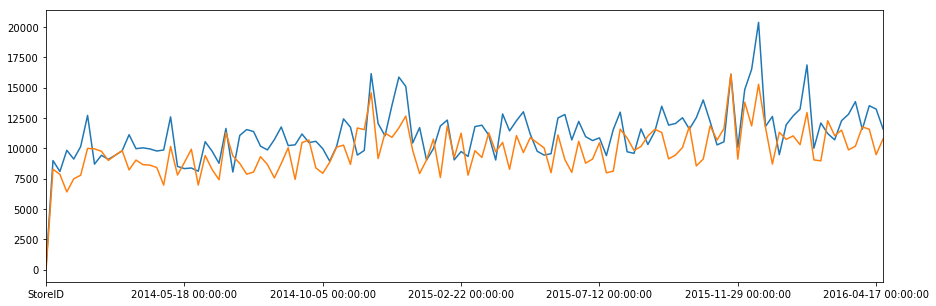

In [6]:
fin.iloc[278].plot(figsize=(15,5))
fin.iloc[21].plot(figsize=(15,5))